In [1]:
import pandas as pd
import numpy as np
import mysql_conn

%matplotlib inline

In [2]:
# paste the boilerplate into a module
conn = mysql_conn.connect()

Please provide your password········


# Sellers

Definition of seller: Has sold an item in a given time frame

**1. How many sellers do we have, between 2017 and end of Sept 2018?**

In [3]:
query = """
SELECT
    DISTINCT oi.seller_id
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01';
    """

unique_sellers = pd.read_sql(query, conn)

In [4]:
unique_sellers.head()

,seller_id
0,3504c0cb71d7fa48d967e0e4c94d59d9
1,289cdb325fb7e7f891c38608bf9e0962
2,4869f7a5dfa277a7dca6462dcf3b52b2
3,66922902710d126a0e7d26b0e3805106
4,2c9e548be18521d1c43cde1c582c6de8


In [40]:
unique_sellers.shape

(2945, 1)

Between 2017 and end of Sept 2018, we had 2945 sellers.

**2. How much do they sell?**

Using descriptive statistics. For example: how many items did they sell on average?

In [6]:
query_2 = """
SELECT
    oi.seller_id,
    COUNT(*) AS items_sold
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01'
GROUP BY oi.seller_id;
    """

items_sold_by_seller = pd.read_sql(query_2, conn)

In [7]:
items_sold_by_seller.describe()

,items_sold
count,2945.000000
mean,37.310017
std,119.996903
min,1.000000
25%,2.000000
50%,8.000000
75%,26.000000
max,1996.000000


In [8]:
items_sold_by_seller.head(20)

,seller_id,items_sold
0,3504c0cb71d7fa48d967e0e4c94d59d9,53
1,289cdb325fb7e7f891c38608bf9e0962,125
2,4869f7a5dfa277a7dca6462dcf3b52b2,1148
3,66922902710d126a0e7d26b0e3805106,155
4,2c9e548be18521d1c43cde1c582c6de8,171
5,8581055ce74af1daba164fdbd55a40de,427
6,16090f2ca825584b5a147ab24aa30c86,406
7,63b9ae557efed31d1f7687917d248a8d,6
8,7c67e1448b00f6e969d365cea6b010ab,1355
9,001cca7ae9ae17fb1caed9dfb1094831,234


In [9]:
items_sold_by_seller["items_sold"].mean()

37.31001697792869

- On average, the sellers have sold 37.3 items

In [10]:
items_sold_by_seller.describe()

,items_sold
count,2945.000000
mean,37.310017
std,119.996903
min,1.000000
25%,2.000000
50%,8.000000
75%,26.000000
max,1996.000000


- Three quarters of our sellers have sold no more than 26 items
- Half of the sellers sold less or equal to 8 items
- The top seller sold 1996 items
- A quarter of the sellers only sold 1 or 2 items

In [11]:
items_sold_by_seller.quantile(.80)

items_sold    36.0
Name: 0.8, dtype: float64

- 80% of the sellers sold no more than the average (37.3)

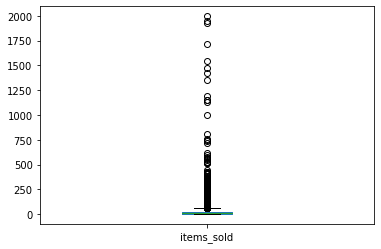

In [12]:
items_sold_by_seller["items_sold"].plot(kind="box");

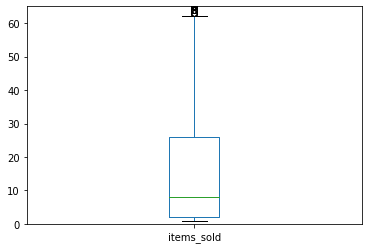

In [13]:
items_sold_by_seller["items_sold"].plot(kind="box", ylim=(0,65));

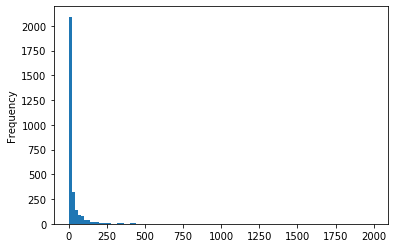

In [14]:
items_sold_by_seller["items_sold"].plot(kind="hist", bins=100);

"Power Law Distribution", "Long-Tail Distribution", "Pareto Distribution"


-> Pretty skewed

In [15]:
items_sold_by_seller["items_sold"].quantile(.9)

83.0

In [16]:
# get deciles
[items_sold_by_seller["items_sold"].quantile(dec / 10) for dec in range(11)]

[1.0, 1.0, 2.0, 3.0, 5.0, 8.0, 12.0, 19.0, 36.0, 83.0, 1996.0]

In [17]:
[dec / 10 for dec in range(11)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [18]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [19]:
items_sold_by_seller.quantile(np.arange(0,1,0.1))

,items_sold
0.0,1.0
0.1,1.0
0.2,2.0
0.3,3.0
0.4,5.0
0.5,8.0
0.6,12.0
0.7,19.0
0.8,36.0
0.9,83.0


**3. How much revenue do they generate?**

In [20]:
query_3 = """
SELECT
    oi.seller_id,
    SUM(oi.price) AS revenue
FROM order_items oi
    JOIN orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_purchase_timestamp >= '2017-01-01'
    AND o.order_purchase_timestamp < '2018-10-01'
GROUP BY oi.seller_id;
    """

rev_by_seller = pd.read_sql(query_3, conn)

In [21]:
rev_by_seller.describe()

,revenue
count,2945.000000
mean,4475.662870
std,13951.130975
min,6.500000
25%,226.000000
50%,849.699982
75%,3514.000000
max,226987.928337


- On average, sellers generated almost 4500 Rios
- Half of the sellers generated less than 850 Rios
- Only one in four sellers generated at least 3500 Rios
- The top 25% of the sellers, generated at least 3500 Rios
- The top sellers generated ~227k Rios

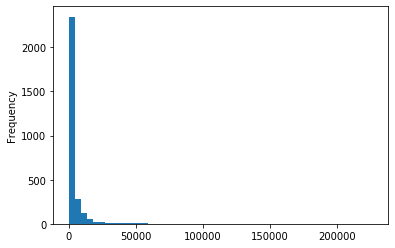

In [22]:
rev_by_seller["revenue"].plot(kind="hist", bins=50);

**How much do we depend on our top sellers?**

1. Sort descending
2. compute rank
3. calculated relative rank
4. calculate cumulative sum
5. calculate cumulative contribution

In [27]:
# 1. Sort descending
rev_contr = rev_by_seller.copy()
rev_contr = (rev_contr
             .sort_values("revenue", ascending=False)
             .reset_index(drop=True))

In [35]:
# 2. compute rank
rev_contr = rev_contr.assign(rank=rev_contr.index + 1)
# rev_contr.assign(rank=range(1, len(rev_contr) + 1))

In [43]:
# 3. calculate relative rank
rev_contr = rev_contr.assign(rel_rank=rev_contr["rank"] / len(rev_contr))

In [47]:
# 4. calculate cumulative sum
rev_contr = rev_contr.assign(cum_revenue=rev_contr["revenue"].cumsum())

In [50]:
# 5. calculate cumulative contribution
rev_contr = rev_contr.assign(revenue_contr=rev_contr["cum_revenue"] / rev_contr["revenue"].sum())

In [57]:
rev_contr.head(30)

,seller_id,revenue,rank,rel_rank,cum_revenue,revenue_contr
0,4869f7a5dfa277a7dca6462dcf3b52b2,226987.928337,1,0.000340,2.269879e+05,0.017221
1,53243585a1d6dc2643021fd1853d8905,217940.439560,2,0.000679,4.449284e+05,0.033756
2,4a3ca9315b744ce9f8e9374361493884,196882.121456,3,0.001019,6.418105e+05,0.048693
3,fa1c13f2614d7b5c4749cbc52fecda94,190917.139381,4,0.001358,8.327276e+05,0.063177
4,7c67e1448b00f6e969d365cea6b010ab,186570.051920,5,0.001698,1.019298e+06,0.077332
5,7e93a43ef30c4f03f38b393420bc753a,164582.489365,6,0.002037,1.183880e+06,0.089818
6,da8622b14eb17ae2831f4ac5b9dab84a,159816.868099,7,0.002377,1.343697e+06,0.101943
7,7a67c85e85bb2ce8582c35f2203ad736,139658.691616,8,0.002716,1.483356e+06,0.112539
8,1025f0e2d44d7041d6cf58b6550e0bfa,138208.560535,9,0.003056,1.621564e+06,0.123024
9,955fee9216a65b617aa5c0531780ce60,131836.710688,10,0.003396,1.753401e+06,0.133027


In [55]:
rev_contr.loc[rev_contr["revenue_contr"].between(0.49,0.51)]

,seller_id,revenue,rank,rel_rank,cum_revenue,revenue_contr
119,8444e55c1f13cd5c179851e5ca5ebd00,21480.960016,120,0.040747,6.462522e+06,0.490297
120,8f2ce03f928b567e3d56181ae20ae952,21213.199875,121,0.041087,6.483735e+06,0.491907
121,05ff92fedb5be47920fea08e501238b9,21146.980145,122,0.041426,6.504882e+06,0.493511
122,59fb871bf6f4522a87ba567b42dafecf,21068.610413,123,0.041766,6.525951e+06,0.495109
123,d2374cbcbb3ca4ab1086534108cc3ab7,20926.020172,124,0.042105,6.546877e+06,0.496697
124,00ee68308b45bc5e2660cd833c3f81cc,20260.000000,125,0.042445,6.567137e+06,0.498234
125,48162d548f5b1b11b9d29d1e01f75a61,20109.389837,126,0.042784,6.587246e+06,0.499760
126,729f06993dac8e860d4f02d7088ca48a,19885.179707,127,0.043124,6.607131e+06,0.501268
127,004c9cd9d87a3c30c522c48c4fc07416,19569.730007,128,0.043463,6.626701e+06,0.502753
128,bfd27a966d91cfaafdb25d076585f0da,19225.000000,129,0.043803,6.645926e+06,0.504212


In [59]:
rev_contr[:100]

,seller_id,revenue,rank,rel_rank,cum_revenue,revenue_contr
0,4869f7a5dfa277a7dca6462dcf3b52b2,226987.928337,1,0.000340,2.269879e+05,0.017221
1,53243585a1d6dc2643021fd1853d8905,217940.439560,2,0.000679,4.449284e+05,0.033756
2,4a3ca9315b744ce9f8e9374361493884,196882.121456,3,0.001019,6.418105e+05,0.048693
3,fa1c13f2614d7b5c4749cbc52fecda94,190917.139381,4,0.001358,8.327276e+05,0.063177
4,7c67e1448b00f6e969d365cea6b010ab,186570.051920,5,0.001698,1.019298e+06,0.077332
...,...,...,...,...,...,...
95,9f505651f4a6abe901a56cdc21508025,25912.839914,96,0.032598,5.904087e+06,0.447930
96,16090f2ca825584b5a147ab24aa30c86,25579.159960,97,0.032937,5.929667e+06,0.449871
97,b94cc9f10ddc85e4ba73a6f7974e7101,25346.100922,98,0.033277,5.955013e+06,0.451794
98,a416b6a846a11724393025641d4edd5e,24930.239904,99,0.033616,5.979943e+06,0.453685


- The top 1% make up approximately a quarter of our revenue
- The top 100 sellers account for approx. 46% of our revenue

-> Different sellers have different value to us. We might want to treat them differently